# Digit Recognizer Dataset Introduction

## Business Problem - Automated Check Scanner System:
MetroPolitan Bank processes over 100,000 paper checks daily across its branches. Currently, employees manually enter check amounts into the banking system, which:

* Takes 2-3 minutes per check
* Has a 2% error rate due to human mistakes
* Costs approximately $2M annually in labor
* Creates significant processing delays for customers

## Challenge:
Design and integrate a machine learning model for digit recognition that can:

* Automatically read handwritten amounts from scanned checks
* Process checks in under 5 seconds
* Achieve 99.9% accuracy
* Flag low-confidence predictions for human review
* Handle different handwriting styles and check formats
* Can be deployed in Production as part of this Auto Check Scanner workflow

## Expected Business Impact:

* 90% reduction in processing time
* $1.8M annual cost savings
* Improved customer satisfaction through faster processing
* Reduced error rates and associated correction costs
* Ability to reallocate clerical staff to higher-value tasks

This Check Scanner requires a robust model that can recognize handwritten digits with high accuracy in a production environment.

## Background and Context:

Handwritten digit recognition is a foundational task in computer vision where the goal is to classify images of handwritten digits into one of 10 classes (0-9). This is commonly achieved using the training dataset, a benchmark dataset containing hand written digit images of 28x28 grayscale digits.

<center><img src="https://www.researchgate.net/publication/356832977/figure/fig1/AS:1099757049122816@1639213921297/Digit-recognition-scenario-addressed-with-the-proposed-neural-network.png" width = 700 height = 300 /></center>

## Objective:

In this module, we aim to build a model which can recognise hand written digits that can be integrated into an Auto Check Scanner system.

- **1. Loading Data and Preprocessing:**
     - Load and display image data.
     - Get the distribution of class.

- **2. Train and validation split:**
     - Split data into 80-20 portion.
     - Check train and validation data classes proportion.

- **3. Convert data to tensors:**
    - Convert data to tensor so that it can be consumed by the pytorch model.

- **4. Create FNN (Feedforward Neural Network):**
    - Create model architecture.
    - Train the model.

- **5. Model Evaluation :**
     - Evaluate the performance of the model using graphs and different metrics.

### Data Description:

The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (`train.csv`), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each `pixel` column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```



In [32]:
# PyTorch imports for building, training, and working with neural networks
import torch                       # Tensor operations and deep learning model support
import torch.nn as nn              # For defining neural network layers
import torch.nn.functional as F    # Provides activation functions and other utilities

# Scikit-learn import for splitting data and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Data handling and numerical computation libraries
import pandas as pd                # For handling structured data
import numpy as np                 # For numerical operations and array manipulations

# Visualization library
import matplotlib.pyplot as plt    # For creating visualizations like graphs and plots

# Import the warnings module, which allows control over warning messages
import warnings

# Suppress all warnings in the script
warnings.filterwarnings("ignore")

# 1. Loading Data and Preprocessing

There are 2 .csv files.

- **train.csv** - contains information about 42 000 (60% of the whole MNIST dataset) gray-scale images of hand-drawn digits (from 0 to 9).
First column is the digit. The rest 784 columns represent pixels of hand-drawn digit (each image has 28 x 28 pixels shape). The value of each pixel-column is an integer between 0 and 255 - represent darkness or lightness of the given pixel.

- **test.csv** - contains information about 28 000 gray-scale images of hand-drawn digits (from 0 to 9). Doesn't contain labels.

# 1.1 Load and display image data

In [33]:
# Mount Google Drive
from google.colab import drive # Used for mounting Google Drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
# Change directories ("cd") to the folder containing the Notebook and Dataset
%cd /content/gdrive/My Drive/Colab Notebooks/IK_Neural_Networks_Basics/

# Read data
train_data = pd.read_csv('./Dataset/Digit Recognizer Dataset/train.csv')
test = pd.read_csv('./Dataset/Digit Recognizer Dataset/test.csv')

# Check that we loaded data correctly
print("Train data shape:", train_data.shape)
print("Test data shape:", test.shape)

print("Train data columns:", train_data.columns)
print("Test data columns:", test.columns)

print("Train data head:", train_data.head(5))
print("Test data head:", test.head(5))

/content/gdrive/My Drive/Colab Notebooks/IK_Neural_Networks_Basics
Train data shape: (42000, 785)
Test data shape: (28000, 784)
Train data columns: Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Test data columns: Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Train data head:    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2

# 1.2 Get the distribution of class

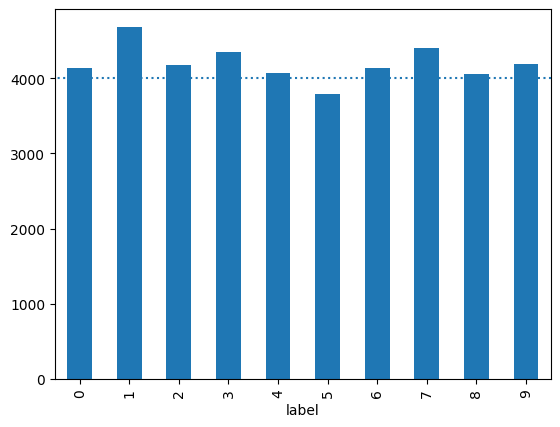

In [35]:
# Count the occurrences of each label in the "label" column of the training data
label_counts = train_data["label"].value_counts().sort_index()

# Plot a bar chart for the label counts
label_counts.plot.bar()

# Add a horizontal dotted line at y = 4000, spanning x-values from -1 to 10
plt.hlines(xmin=-1, xmax=10, y=4000, linestyles='dotted')

**Explanation:**
Converting a DataFrame to a NumPy array provides better control over the data processing pipeline, especially when working with datasets like the MNIST digits dataset. Here’s why this step is important and beneficial:

- **Streamlined Data Handling:** NumPy arrays are the standard input format for most machine learning libraries (e.g., TensorFlow, PyTorch, Scikit-learn). By converting your DataFrame to a NumPy array, you ensure compatibility and simplify the integration of your data into these frameworks.

- **Performance Optimization:** NumPy arrays are highly optimized for numerical operations and memory management. This can lead to faster computations compared to using DataFrames, especially when performing operations on large datasets like MNIST.

- **Avoid Potential Issues:** DataFrames may include metadata, index labels, or mixed data types, which could inadvertently cause errors or inefficiencies during processing. Explicitly converting to a NumPy array strips away this additional structure, leaving only the raw numerical data required for model training or evaluation.

In [36]:
# Extract all columns except the first (assumed to be labels) as features (pixel data)
train_all = train_data.iloc[:, 1:]  # Only features (pixels)

# Extract the "label" column as the target variable
train_all_label = train_data["label"]  # Labels

# Convert the features DataFrame to a NumPy array for further processing
train_all_numpy = train_all.to_numpy()

# Convert the labels Series to a NumPy array
train_all_label_numpy = train_all_label.to_numpy()

# Convert the test data DataFrame to a NumPy array
test_numpy = test.to_numpy()


Shape of train_all_numpy: (42000, 784)
Shape of train_all_label_numpy: (42000,)
Shape of test_numpy: (28000, 784)


Next step is to plot the images.
The `plot_img` function serves the following purposes:

1. **Visualization of Image Data:**
  - Visualizing images helps in understanding the dataset better. For example:
    - It allows you to confirm that the images are correctly loaded and preprocessed.
    - It provides insights into the patterns and variability in the image data.
2. **Label Verification:**
- By displaying both the image and its corresponding label, the function allows you to verify that the labels align correctly with the images. This can help identify data mismatches or labeling errors.

**Output:**
  - The output will be 3x3 grid of images along with the labels.

In [37]:
def plot_img(data, label, grid_dim=3):
    """
    Plots a grid of images along with their corresponding labels.

    Parameters:
    data (numpy.ndarray):   A NumPy array containing the pixel data for the images.
                            Each image should be flattened (e.g., 784 pixels for 28x28 images).
    label (numpy.ndarray):  A NumPy array containing the labels for the images.
    grid_dim (int):         The number of rows and columns in the grid (default is 3).

    Returns:
    None: Displays the plot with images and labels.
    """

    # Create a x*x grid of subplots (default of 9 images in total)
    fig, axs = plt.subplots(grid_dim, grid_dim)

    k = 0  # Initialize counter for the image index

    # Loop through each row (i) and column (j) of the grid
    for i in range(grid_dim):
        for j in range(grid_dim):
            # Display the k-th image in the grid, reshaping it to 28x28 and converting to uint8
            axs[i, j].imshow(data[k].astype('uint8').reshape(28, 28))  # Plot image

            # Set the label for the image as the subplot's y-axis label
            axs[i, j].set_ylabel("label:" + str(label[k].item()))  # Print label

            k += 1  # Increment the counter


k (image index) now is : 9


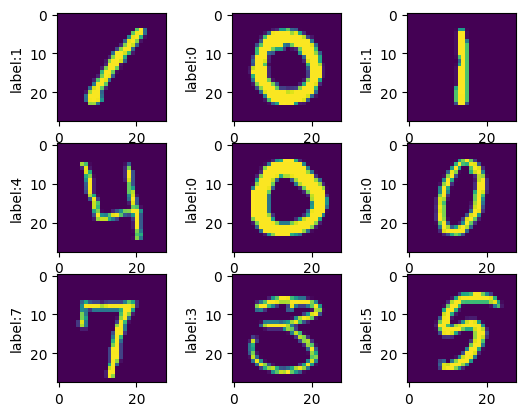

In [38]:
# Call the function to plot images with corresponding labels
plot_img(train_all_numpy, train_all_label_numpy)

# 2. Train and validation split

The process of splitting a dataset into training and validation sets is a critical step in machine learning. It ensures that the model is trained on one portion of the data and evaluated on another to measure its performance and generalizability.

# 2.1 Split data into 80-20 portion

We will randomly split the training data into training and validation datasets in the proportion 80:20.
To do so, we will be using `train_test_split()` function from `sklearn` module.

In [39]:
# Split the data into training and validation sets
# `test_size=0.2` means 20% of the data will be used for validation, and 80% for training
train, validation, train_label, validation_label = train_test_split(
    train_all_numpy, train_all_label_numpy, test_size=0.2
)

# Print the shape of the training data to verify the split
print(train.shape)  # Shape of the training features (80% of total data)

# Print the shape of the training labels to ensure it matches the training features
print(train_label.shape)  # Shape of the training labels (corresponding to 80% data)

# Print the shape of the validation data
print(validation.shape)  # Shape of the validation features (20% of total data)

# Print the shape of the validation labels to ensure it matches the validation features
print(validation_label.shape)  # Shape of the validation labels (corresponding to 20% data)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


# 2.2 Check train and validation data classes proportion

It involves verifying if both datasets represent all classes in fair proportion. Ensuring consistent proportions prevents class imbalance issues that can affect model performance.

Text(0.5, 1.0, 'Validation Class Distribution')

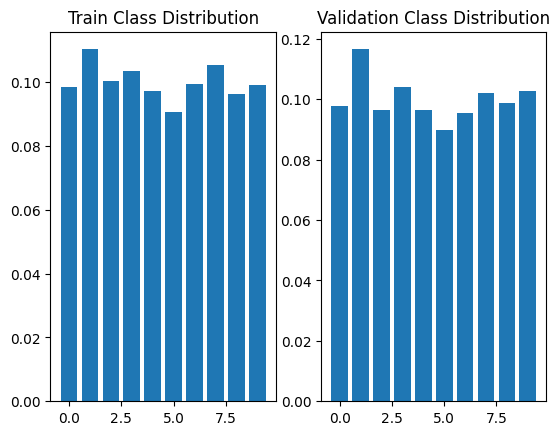

In [40]:
# Get the unique class labels and their counts for the training data
unique, counts_train = np.unique(train_label, return_counts=True)

# Create the first subplot for the training data class distribution
plt.subplot(1, 2, 1)
# Plot the class distribution as a bar chart, normalized by the total number of training labels
plt.bar(unique, counts_train / len(train_label))
plt.title("Train Class Distribution")

# Get the unique class labels and their counts for the validation data
unique, counts_val = np.unique(validation_label, return_counts=True)

# Create the second subplot for the validation data class distribution
plt.subplot(1, 2, 2)
# Plot the class distribution as a bar chart, normalized by the total number of validation labels
plt.bar(unique, counts_val / len(validation_label))
plt.title("Validation Class Distribution")

# Optionally, print the class distribution for both training and validation sets as a table-like format
# print(np.asarray((unique, counts_train / len(train_label), counts_val / len(validation_label))).T)

** Interpretation:**
There are no class imbalance issues and all the classes seem to be proportionately represented.

# 3. Convert data to tensors

Tensors are multi-dimensional arrays that are a generalization of scalars, vectors, and matrices. They form the core data structure in deep learning frameworks like `PyTorch` and `TensorFlow`. Tensors allow for efficient computation on GPU and CPU, making them ideal for machine learning and deep learning tasks.

To use data in PyTorch models, it needs to be converted into tensors. This is done using `torch.tensor()` or by converting NumPy arrays directly to tensors. Tensors are multi-dimensional arrays that are the core data structure in PyTorch, similar to NumPy arrays, but optimized for GPU computations.

In [41]:
# Convert the training feature data (NumPy array) to a PyTorch tensor and ensure it is of type FloatTensor
train_all_tensor = torch.as_tensor(train_all_numpy).type(torch.FloatTensor)
# train_all_tensor = torch.tensor(train_all_numpy, dtype=torch.float32)

# Convert the training label data (NumPy array) to a PyTorch tensor (default type)
train_all_label_tensor = torch.as_tensor(train_all_label_numpy)

# Convert the test feature data (NumPy array) to a PyTorch tensor and ensure it is of type FloatTensor
test_tensor = torch.as_tensor(test_numpy).type(torch.FloatTensor)

# Convert the split training feature data (NumPy array) to a PyTorch tensor and ensure it is of type FloatTensor
train_tensor = torch.as_tensor(train).type(torch.FloatTensor)

# Convert the split training label data (NumPy array) to a PyTorch tensor (default type)
train_label = torch.as_tensor(train_label)
print(f'train_tensor shape: {train_tensor.shape}')
print(f'train_label shape: {train_label.shape}')

# Convert the split validation feature data (NumPy array) to a PyTorch tensor and ensure it is of type FloatTensor
validation_tensor = torch.as_tensor(validation).type(torch.FloatTensor)

# Convert the split validation label data (NumPy array) to a PyTorch tensor (default type)
validation_label = torch.as_tensor(validation_label)



train_tensor shape: torch.Size([33600, 784])
train_label shape: torch.Size([33600])


### Auto-detect if GPU is available

In [ ]:
if device

# 4. Create FNN (Feedforward Neural Network)

To create a Feedforward Neural Network (FNN) in PyTorch, you need to define a class. The class includes the layers of the network (input, hidden, and output layers), activation functions (like ReLU), and the forward pass for data propagation.

# 4.1. Create model architecture

- **Layers:**

  - A fully connected neural network consists of a series of fully connected layers.
  - The first layer takes the 784 (28 x 28) input pixels and connects to the first 600 node hidden layer. Then we have 600 to 500 hidden layer, 500 to 250 hidden layer and in the end the connection between the last hidden layer and the output layer (with 10 nodes).

- **Input:**
  - 784 (Image Shape): The input layer size, representing a flattened 28x28 grayscale image with 784 pixels.

  - 3 Hidden Layers (600, 500, 250 Nodes): Intermediate layers of the neural network that learn hierarchical features from the input data. Each layer transforms the data to a lower-dimensional representation.

  - Output: 10 Neurons: The final layer of the network, where each neuron represents one of the 10 possible classes (e.g., digits 0–9 for digit classification).

  - nn.Linear: A PyTorch layer that defines a fully connected (dense) layer. It connects all nodes of one layer to all nodes of the next, enabling transformations with learned weights and biases.

- **Forward method:**

  - First, we need to reshape tensor x, so I use the view function for it.
Second, input data x into the first fully connected layer (`self.fc1(x)`) and then apply a ReLU activation to the nodes in this layer using. Because of the hierarchical nature of this network, we replace x at each stage, feeding it into the next layer.

  - We do this through our three fully connected layers, except for the last one.

As activation function, we will use ReLU (The Rectified Linear Unit). It gives an output 0 if x is negative and x otherwise. The purpose of the activation function is to introduce non-linearity into the network (non-linear means that the output can not be reproduced from a linear combination of the inputs). To do it in code, we will use `F.relu` - applies the rectified linear unit function element-wise.



In [42]:
# nn.Module - Base class for all neural network modules.
class FNet(nn.Module):
    """
    FNet is a Feedforward Neural Network (FNN) with 4 fully connected layers.
    The network takes an input of size 784 (e.g., for flattened 28x28 pixel images like MNIST),
    processes it through hidden layers, and outputs predictions for 10 classes (e.g., digits 0-9).
    """

    def __init__(self):
        """
        Initializes the layers of the network.
        The network has 4 fully connected layers with varying numbers of neurons.
        """
        super(FNet, self).__init__()

        # First fully connected layer, connecting 784 input features to 600 hidden neurons
        self.fc1 = nn.Linear(in_features=784, out_features=600)

        # Second fully connected layer, connecting 600 hidden neurons to 500 neurons
        self.fc2 = nn.Linear(in_features=600, out_features=500)

        # Third fully connected layer, connecting 500 hidden neurons to 250 neurons
        self.fc3 = nn.Linear(in_features=500, out_features=250)

        # Fourth fully connected layer, connecting 250 neurons to the 10 output classes
        self.fc4 = nn.Linear(in_features=250, out_features=10)

    def forward(self, x):
        """
        Defines the forward pass of the network.
        The input x is passed through each layer, with ReLU activations applied to the hidden layers.

        Args:
            x (torch.Tensor): The input tensor, typically a batch of flattened images.

        Returns:
            torch.Tensor: The output tensor, typically a batch of class scores.
        """
        # Conditionally flatten the input if it is not already flattened
        if len(x.shape) != 2 or x.shape[1] != 784:
            # Flatten the input to a 1D vector of size 784 (28x28 image flattened)
            x = x.view(-1, 784)  # -1 infers the batch size

        # Pass the input through the first layer, apply ReLU activation
        x = F.relu(self.fc1(x))

        # Pass the result through the second layer, apply ReLU activation
        x = F.relu(self.fc2(x))

        # Pass the result through the third layer, apply ReLU activation
        x = F.relu(self.fc3(x))

        # Pass the result through the fourth layer to get the final output (raw scores)
        x = self.fc4(x)

        return x

# 4.2 Train the model

- **Training process:**
  - Do a forward pass
  - Calculate loss function
  - Calculate the gradients
  - Change the weights based on gradients
  
The entire training of the network is based on minimizing the loss function. An optimizer determines, based on the loss function, how each parameter should change. The optimizer solves the credit assignment problem: how do we assign credit to the parameters when the network performs poorly?

**Neural Network term explanation:**

Training a neural network involves adjusting the weights of the model so it can learn patterns in the data to make accurate predictions. Here's a step-by-step high-level overview:

 - **Forward Pass:**
    - The input data (images) is passed through the network layer by layer.
    - Each layer applies its learned weights and biases to the data to compute outputs.
    - The final output is compared to the actual labels to measure performance using a loss function.

 - **Loss Calculation:**
  - A loss function (e.g., Cross-Entropy Loss) calculates the difference between the predicted outputs and the actual labels.

- **Backward Pass (Backpropagation):**

  - The network calculates gradients of the loss with respect to each weight using the chain rule.
  - These gradients indicate how each weight contributes to the error.

- **Weight Updates:**
  - Using an optimizer (e.g., SGD, Adam), the weights are updated based on the calculated gradients to reduce the loss.

- **Epochs:**
  - The process is repeated for the entire dataset multiple times, called epochs, until the model converges (i.e., the loss stops decreasing significantly).

**Explanation of Key terms:**

- **Epoch:**
  - An epoch is one complete pass of the entire dataset through the network during training.
  - Neural networks need multiple epochs because a single pass (one epoch) may not be sufficient for the network to learn complex patterns.

- **Batch Size:**

  - Instead of passing the entire dataset at once, the data is divided into smaller groups called batches. This makes training efficient and allows for better memory management.

In [43]:
def get_accuracy(predictions, true_labels):
    """
    Calculate the accuracy of the model's predictions.

    Args:
        predictions (torch.Tensor): A tensor of model's raw output scores (logits),
                                     shape [batch_size, num_classes].
        true_labels (torch.Tensor): A tensor of the true labels, shape [batch_size].

    Returns:
        float: The accuracy of the model, represented as a percentage.
    """

    # Get the predicted class by finding the index with the maximum value in each row
    # torch.max returns both the values and indices, we use the indices for predictions
    _, predicted = torch.max(predictions, 1)

    # Compare the predicted labels with the true labels and count the correct predictions
    corrects = (predicted == true_labels).sum()

    # Calculate accuracy as the ratio of correct predictions to total number of samples
    accuracy = 100.0 * corrects / len(true_labels)

    # Return the accuracy as a float (percentage value)
    return accuracy.item()

In [44]:
def training(dataloader, epochs, model, criterion, optimizer):
    """
    Trains the neural network model over multiple epochs using a given dataloader, loss function, and optimizer.

    Args:
        dataloader (torch.utils.data.DataLoader): The data loader for the training dataset.
        epochs (int): The number of epochs (iterations over the entire dataset).
        model (torch.nn.Module): The neural network model to be trained.
        criterion (torch.nn.Module): The loss function used to calculate the error.
        optimizer (torch.optim.Optimizer): The optimizer used to update the model weights.

    Returns:
        tuple: A tuple containing two lists:
            - train_accuracies: A list of training accuracy for each epoch.
            - train_losses: A list of training loss for each epoch.
    """

    # Initialize lists to store accuracies and losses over epochs
    train_accuracies, train_losses = [], []

    # Set the model to training mode (enables features like dropout, batch norm)
    model.train()

    # Loop over the number of epochs
    for epoch in range(epochs):

        # Initialize variables to track loss and accuracy for each epoch
        train_loss = 0
        train_accuracy = 0
        num_batch = 0

        # Iterate over batches in the training dataset
        for data, labels in dataloader:

            # Zero the gradients from the previous batch to avoid accumulation
            optimizer.zero_grad()

            # Forward pass: pass the data through the model to get predictions
            predictions = model(data)

            # Calculate the loss using the predictions and true labels
            loss = criterion(predictions, labels)

            # Calculate the accuracy for the current batch
            accuracy = get_accuracy(predictions, labels)

            # Backward pass: compute the gradients with respect to the loss
            loss.backward()

            # Update the model's weights using the optimizer
            optimizer.step()

            # Increment the number of batches processed
            num_batch += 1

            # Accumulate the total loss and accuracy for this epoch
            train_loss += loss.item()
            train_accuracy += accuracy

        # Calculate the average loss and accuracy for the epoch
        epoch_accuracy = train_accuracy / num_batch
        epoch_loss = train_loss / num_batch

        # Append the results to the lists
        train_accuracies.append(epoch_accuracy)
        train_losses.append(epoch_loss)

        # Print the results for the current epoch
        print("Batches processed", num_batch)
        print("Epoch: {}/{} ".format(epoch + 1, epochs),
              "Training Loss: {:.4f} ".format(epoch_loss),
              "Training accuracy: {:.4f}".format(epoch_accuracy))

    # Return the training accuracy and loss for each epoch
    return train_accuracies, train_losses

In [45]:
# Set the random seed to make results reproducible
torch.manual_seed(0)

# Define the batch size for training
batch_size = 128

# Create a dataset using the training data and labels
train_dataset = torch.utils.data.TensorDataset(train_tensor, train_label)

# Create a DataLoader to handle batching, shuffling, and loading the training data
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Set the number of epochs (iterations over the entire dataset) for training
epochs = 40

# Initialize the neural network model
net = FNet()

# Define the loss function (CrossEntropyLoss is commonly used for classification problems)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer with a learning rate of 3e-4)
optimizer = torch.optim.Adam(net.parameters(), lr=3e-4)

# Start the training process by calling the 'training' function
# This will train the model over the specified number of epochs
train_accuracies, train_losses = training(trainloader, epochs, net, criterion, optimizer)

Batches processed 263
Epoch: 1/40  Training Loss: 0.3025  Training accuracy: 91.4330
Batches processed 263
Epoch: 2/40  Training Loss: 0.0895  Training accuracy: 97.1275
Batches processed 263
Epoch: 3/40  Training Loss: 0.0506  Training accuracy: 98.3514
Batches processed 263
Epoch: 4/40  Training Loss: 0.0341  Training accuracy: 98.8861
Batches processed 263
Epoch: 5/40  Training Loss: 0.0280  Training accuracy: 99.0910
Batches processed 263
Epoch: 6/40  Training Loss: 0.0331  Training accuracy: 98.9009
Batches processed 263
Epoch: 7/40  Training Loss: 0.0264  Training accuracy: 99.1207
Batches processed 263
Epoch: 8/40  Training Loss: 0.0210  Training accuracy: 99.3108
Batches processed 263
Epoch: 9/40  Training Loss: 0.0234  Training accuracy: 99.2514
Batches processed 263
Epoch: 10/40  Training Loss: 0.0181  Training accuracy: 99.4178
Batches processed 263
Epoch: 11/40  Training Loss: 0.0173  Training accuracy: 99.4772
Batches processed 263
Epoch: 12/40  Training Loss: 0.0216  Trai

## Interpretation:

The training process shows a steady decrease in loss and a rapid increase in accuracy during the initial epochs, indicating effective learning. After stabilizing above 99% accuracy, the model refines its performance with small fluctuations in later epochs. The plateauing loss suggests the model has learned the data well without significant overfitting.

# 5. Model Evaluation

It refers to the process of assessing the performance of a trained machine learning model. The goal is to understand how well the model generalizes to unseen data (validation or test data), and to ensure that it performs well across different evaluation metrics.

In [46]:
def train_curves(epochs, train_losses, train_accuracies):
    """
    This function plots the training loss and training accuracy over epochs.

    Parameters:
    epochs (int): The total number of epochs during training.
    train_losses (list): A list of training loss values recorded at each epoch.
    train_accuracies (list): A list of training accuracy values recorded at each epoch.

    Returns:
    None: This function displays a plot showing the training loss and accuracy curves.
    """

    # Create a range for iterations corresponding to each epoch (1 to epochs)
    iters = range(1, epochs + 1)

    # Set up a figure with two subplots (one for loss and one for accuracy)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    # Set the title for the entire figure
    fig.suptitle('Training Curve')

    # Plot the training loss on the first subplot (ax1)
    ax1.plot(iters, train_losses)
    ax1.set_xlabel("Iterations")  # Label for the x-axis
    ax1.set_ylabel("Loss")  # Label for the y-axis

    # Plot the training accuracy on the second subplot (ax2) with a green color
    ax2.plot(iters, train_accuracies, color='g')
    ax2.set_xlabel("Iterations")  # Label for the x-axis
    ax2.set_ylabel("Training Accuracy")  # Label for the y-axis

    # Display the plot
    plt.show()

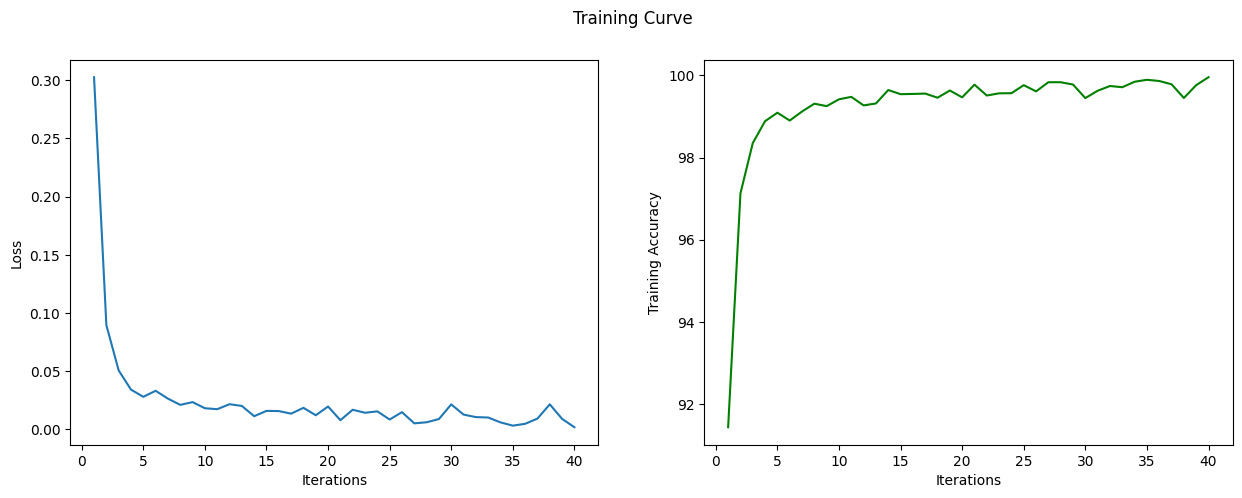

In [47]:
# Call the function to plot the training loss and accuracy curves
train_curves(epochs, train_losses, train_accuracies)

##Interpretation of Training:

**The training curves show the following:**

  - **Loss Curve (Left Plot):** The training loss decreases sharply in the first few iterations and then stabilizes with minor fluctuations. This indicates rapid learning during initial epochs and gradual convergence as the model optimizes further.

  - **Accuracy Curve (Right Plot):** Training accuracy improves significantly in early iterations, surpassing 98% by epoch 5, and gradually approaches 100% with slight fluctuations. This suggests the model is effectively learning and refining its predictions.

In [48]:
# set net in test (evaluation) mode
net.eval()

# get predictions
val_predictions = net(validation_tensor)

val_loss = criterion(val_predictions, validation_label)

# Compute the accuracy by comparing the predicted labels with the true validation labels.
val_accuracy = get_accuracy(val_predictions, validation_label)

# Print the results
print("Validation Loss: ", str(val_loss.item()), "Validation Accuracy: ", str(val_accuracy))

# to get class with the maximum score as prediction
_, val_predicted = torch.max(val_predictions.data, 1)

# Create the confusion matrix comparing the true validation labels ('validation_label') with the predicted labels ('val_predicted').
confusion_matrix(validation_label, val_predicted)

Validation Loss:  0.15702639520168304 Validation Accuracy:  98.02381134033203


array([[807,   0,   1,   4,   0,   0,   3,   0,   5,   0],
       [  0, 967,   6,   0,   1,   0,   1,   0,   3,   1],
       [  2,   0, 789,   4,   1,   0,   2,   6,   5,   2],
       [  0,   0,   4, 860,   1,   7,   0,   1,   1,   1],
       [  0,   0,   1,   0, 799,   0,   1,   3,   0,   6],
       [  1,   0,   3,   6,   0, 735,   3,   0,   5,   1],
       [  1,   3,   0,   3,   5,   5, 783,   0,   1,   0],
       [  1,   4,   5,   0,   4,   1,   0, 834,   2,   6],
       [  0,   0,   1,   2,   3,   3,   0,   0, 815,   6],
       [  0,   1,   1,   2,   5,   3,   0,   3,   3, 845]])

##Interpretation with Validation Dataset:
The confusion matrix summarizes the model's classification performance by showing correct predictions along the diagonal and misclassifications in off-diagonal entries. Most predictions fall along the diagonal, indicating strong performance across classes. Misclassifications are scattered, but their relative scarcity reflects the model's overall accuracy and effectiveness.

k (image index) now is : 9


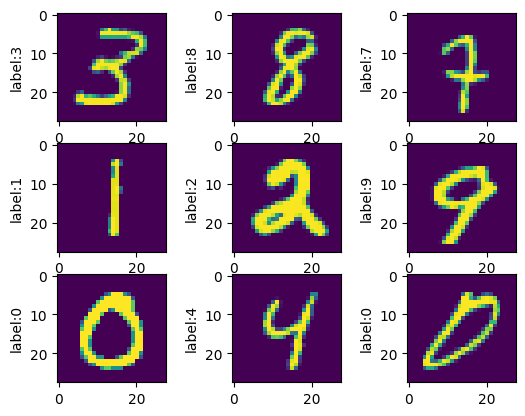

In [49]:
# Call the plotting function to visualize the model's performance
plot_img(validation, val_predicted)

k (image index) now is : 9


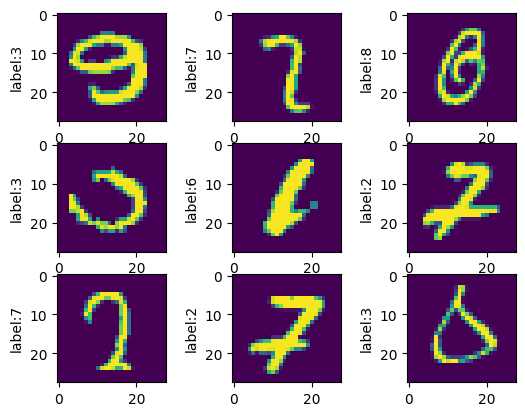

In [50]:
# Identify the misclassified samples in the validation set
# 'validation_label' contains the actual target values, and 'val_predicted' contains the predicted values.
# The condition 'validation_label != val_predicted' identifies where the prediction is incorrect.
val_wrong = validation[validation_label != val_predicted]  # Extracts the data points where prediction was wrong

# 'val_lab_wrong' stores the corresponding predicted values for the misclassified samples
val_lab_wrong = val_predicted[validation_label != val_predicted]  # Extracts predicted values for the misclassified samples

# Plotting the misclassified samples against their predicted labels
# The plot will show how the model performed for the wrongly classified samples.
plot_img(val_wrong, val_lab_wrong)  # Visualizes the incorrectly predicted validation samples

## Conclusion:

In this notebook, we trained a neural network model for handwriting recognition, classifying images of digits (0-9). By monitoring the training loss and accuracy over epochs, we observed steady improvement in performance as the model learned from the data.

**Key Takeaways:**
  - **Training Process:** The model's performance improves over epochs, showcasing the importance of iterative learning in handwriting recognition.
  - **Accuracy vs Loss:** Lower loss typically leads to higher accuracy, indicating effective model learning.
  - **Confusion Matrix:** It revealed specific misclassifications, which is useful for refining the model.

This exercise highlights the importance of training, evaluation, and understanding model behavior through metrics like loss, accuracy, and confusion matrix in handwriting recognition tasks.

# 6. Predictions with Test Dataset and Submission


In [70]:
import os
import csv
from datetime import datetime

# Generate predictions with model
def predict(model, dataloader):
    """Generates predictions for the test dataset.

    Args:
        model (nn.Sequential): Your initialized network, stored in a `Sequential` object.
        dataloader (torch.utils.data.DataLoader): Initialized test dataloader
        device (str): The device to run the model on, default is 'cpu'.

    Returns:
        list: Should be same length as the test dataset, containing integers (or numpy integers).
    """
    model.eval()           # Switch to evaluation mode

    preds = []             # List to store predictions
    with torch.no_grad():  # Turn off gradient calculation
        for inputs in dataloader:
            logits = model(inputs[0])               # Get logits from model
            predicted = logits.argmax(dim=1)        # Get the class with the highest score (predictions)
            preds.extend(predicted.cpu().numpy())   # Convert predictions to numpy and extend the list
    return preds

# Export predictions to a CSV
def export_predictions_to_csv(preds):
    """Export list of predictions to formatted `.csv` file.

    Args:
        preds (list(np.array, np.array, ...)): Should be output of `predict()`
        filename (str): Name/path of csv file to output
    """

    if not os.path.exists("Submissions"):
        os.mkdir("Submissions/")
    file_name = f"Submissions/submission_{datetime.now()}.csv"
    with open(file_name, 'w', newline = '') as f:
        reader = csv.writer(f)
        reader.writerow(['imageId', 'label'])
        reader.writerows(enumerate(preds))
    print(f"Wrote predictions to {file_name}")





Wrote predictions to Submissions/submission_2025-01-03 21:26:05.630597.csv
